# 数据可视化和描述性分析

In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib
from matplotlib import pyplot as plt
ZHFONT = matplotlib.font_manager.FontProperties(fname="data/SourceHanSansSC-Regular.otf")

# df_members = pd.read_csv("data/members.csv")
df_train = pd.read_csv("data/train.csv")
df_songs = pd.read_csv("data/songs.csv")
df_songs_extra = pd.read_csv("data/song_extra_info.csv")

# 将train，songs和songs_extra进行内连接
df_train = df_train.merge(df_songs,on="song_id",how="inner")
df_train = df_train.merge(df_songs_extra,on="song_id",how="inner")

## 热门音乐统计

In [2]:
df_train_grouped = df_train.groupby('song_id').agg({'name': 'first','msno' : ['count','nunique']})
df_train_grouped.columns = ['歌曲名称','播放次数','听众数量']
df_train_grouped.sort_values(['播放次数','听众数量'],inplace=True,ascending=False)
display(df_train_grouped)

,歌曲名称,播放次数,听众数量
song_id,,,
reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,帥到分手,13973,13973
T86YHdD4C9JSc274b1IlMkLuNdz4BQRB50fWWE7hx9g=,告白氣球,13293,13293
wBTWuHbjdjxnG1lQcbqnK4FddV24rUhuyrYLd9c/hmk=,小幸運 (A little happiness),13079,13079
FynUyq0+drmIARmK1JZ/qcjNZ7DKkqTY6/0O0lTzNUI=,你，好不好？ (How Have You Been?),12855,12855
PgRtmmESVNtWjoZHO5a1r21vIz9sVZmcJJpFCbRa1LI=,謝謝妳愛我 (Thanks For Your Love),12004,12004
...,...,...,...
zzszihw3XMMQTHFYM56VImzZMZke1RqZop3jHfIzkDA=,Bus Ted,1,1
zzu3LS+/DuIiG2KkZCuU6goVDbT3dyy57R03yfJLjkU=,"Piano Sonata No. 23| Op. 23 ""Appassionata"": II...",1,1
zzubyBL9pJJy9AZkG2ZYlVG+dQBmPvxVW8jitp4b8MA=,陌生的城市,1,1


findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Sourc

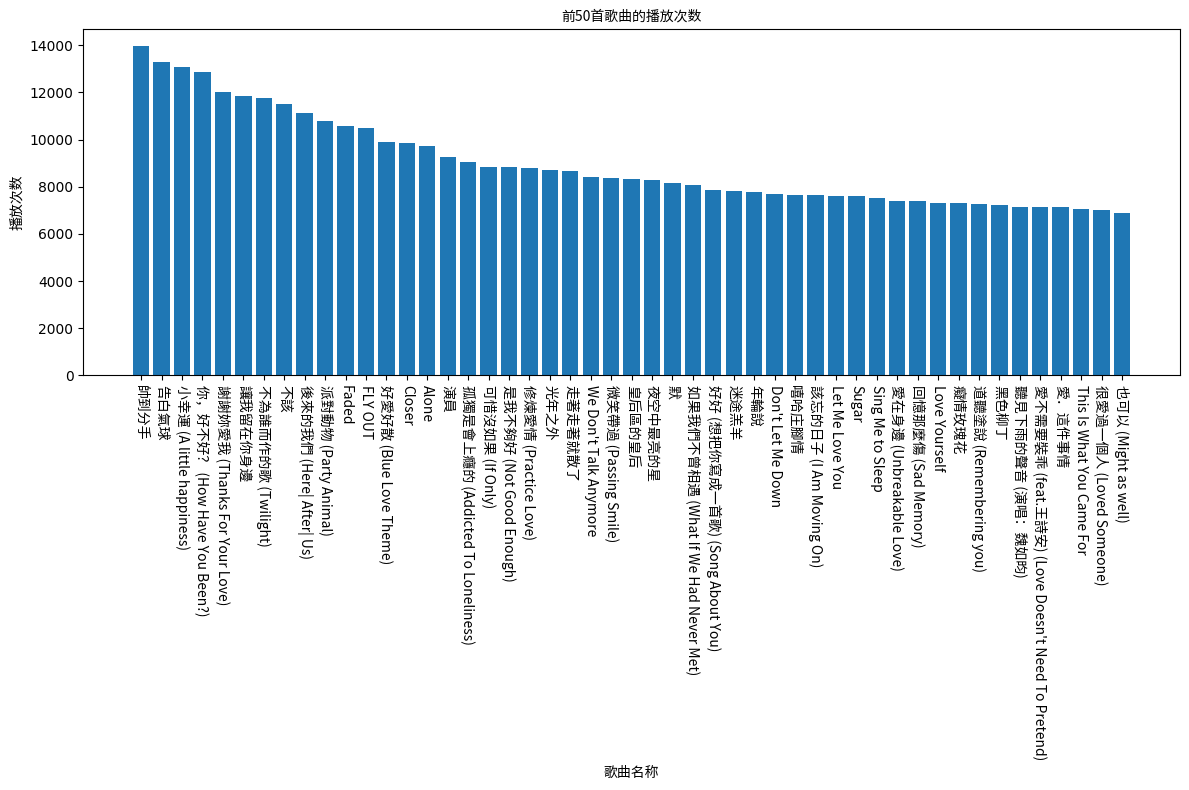

In [14]:
# 选取前50绘制统计图
artists = df_train_grouped.head(50)
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(artists['歌曲名称'],artists['播放次数'])
plt.xticks(rotation=-90,fontproperties=ZHFONT)
plt.xlabel('歌曲名称',fontproperties=ZHFONT)
plt.ylabel('播放次数',fontproperties=ZHFONT)
plt.title('前50首歌曲的播放次数', fontproperties=ZHFONT)
plt.tight_layout()
plt.show() 

## 热门歌手统计

In [3]:
df_train_grouped = df_train.groupby('artist_name').agg({'msno' : ['count','nunique']})
df_train_grouped.columns = ['播放次数','听众数量']
df_train_grouped.sort_values(['播放次数','听众数量'],inplace=True,ascending=False)
display(df_train_grouped)

,播放次数,听众数量
artist_name,,
Various Artists,303506,22256
周杰倫 (Jay Chou),186776,18727
五月天 (Mayday),182088,18183
林俊傑 (JJ Lin),115325,17160
田馥甄 (Hebe),104946,18771
...,...,...
하동균&이정,1,1
허각&LE (EXID),1,1
헤이지 혼 HAZY HORN,1,1


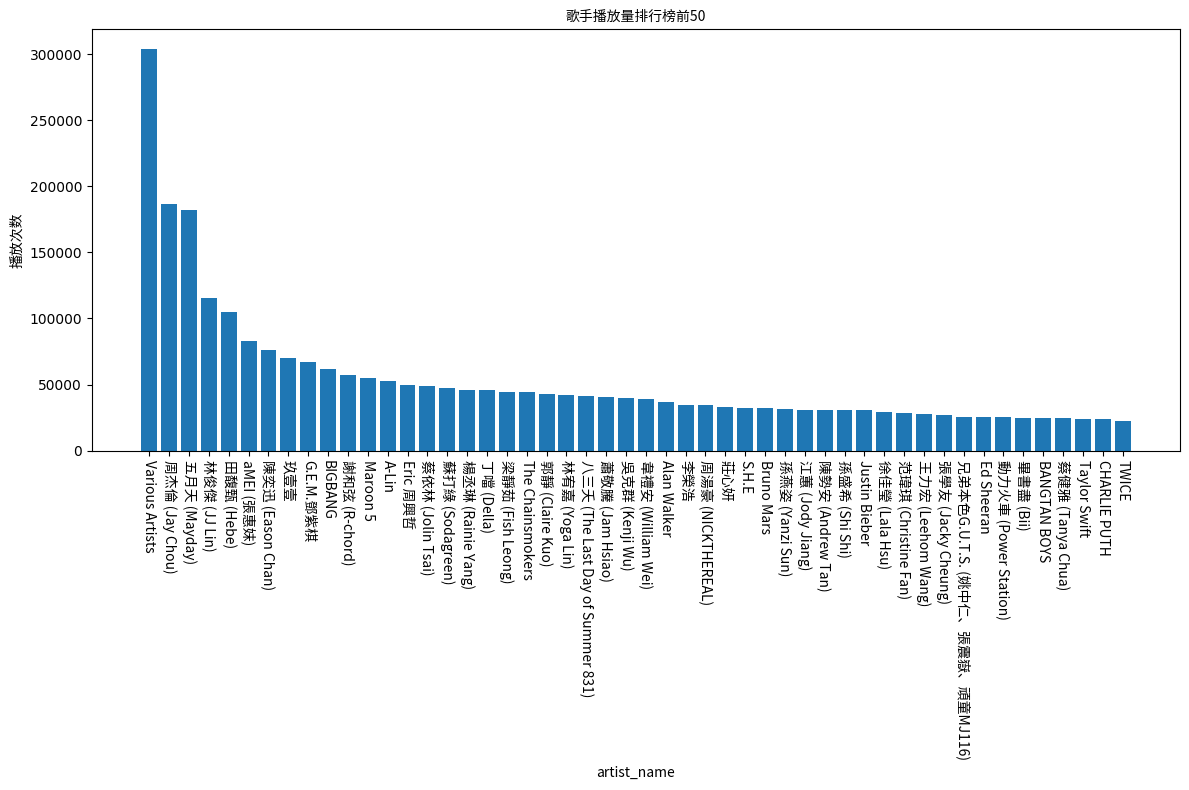

In [4]:
# 选取前50绘制统计图
artists = df_train_grouped.head(50)
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(artists.index,artists['播放次数'])
plt.xticks(rotation=-90,fontproperties=ZHFONT)
plt.xlabel('artist_name',fontproperties=ZHFONT)
plt.ylabel('播放次数',fontproperties=ZHFONT)
plt.title('歌手播放量排行榜前50', fontproperties=ZHFONT)
plt.tight_layout()
plt.show() 

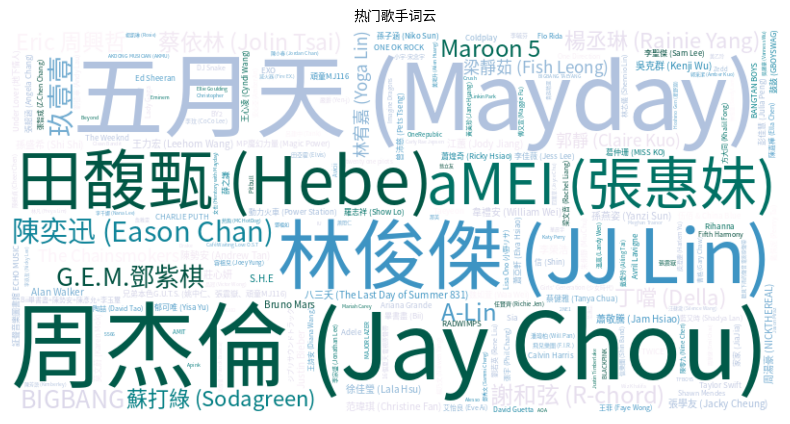

In [11]:
# 绘制词云
artist_counts = df_train['artist_name'].value_counts().to_dict() # 统计每个歌手的出现频率
del artist_counts['Various Artists'] # 去除“群星”歌手

wordcloud = WordCloud(font_path='data/SourceHanSansSC-Regular.otf',width=800,height=400,background_color='white',colormap='PuBuGn').generate_from_frequencies(artist_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('热门歌手词云',fontproperties=ZHFONT)
plt.show()

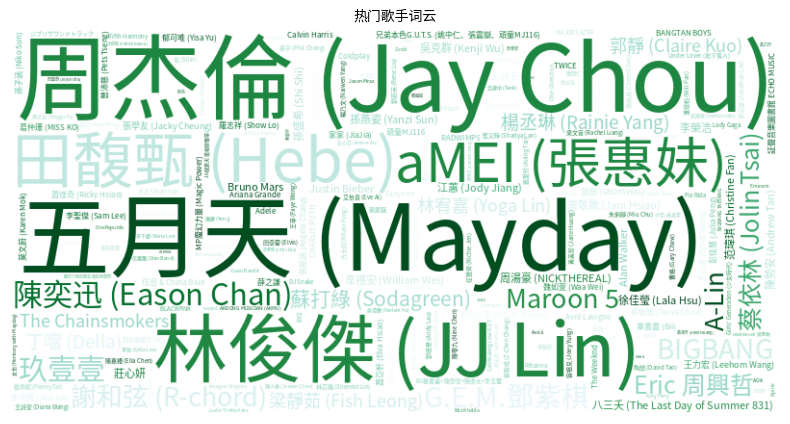

In [ ]:
# 绘制词云
artist_counts = df_train['artist_name'].value_counts().to_dict() # 统计每个歌手的出现频率
del artist_counts['Various Artists'] # 去除“群星”歌手

wordcloud = WordCloud(font_path='data/SourceHanSansSC-Regular.otf',width=800,height=400,background_color='white',colormap='BuGn').generate_from_frequencies(artist_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('热门歌手词云',fontproperties=ZHFONT)
plt.show()

## source_type统计

In [12]:
df_train_grouped = df_train.groupby('source_type').agg({'msno' : ['count']})
df_train_grouped.columns = ['触发次数']
df_train_grouped.sort_values(['触发次数'],inplace=True,ascending=False)
display(df_train_grouped)

,触发次数
source_type,
local-library,2261119
online-playlist,1967350
local-playlist,1079317
radio,482954
album,477144
top-hits-for-artist,423552
song,244670
song-based-playlist,210500
listen-with,192818


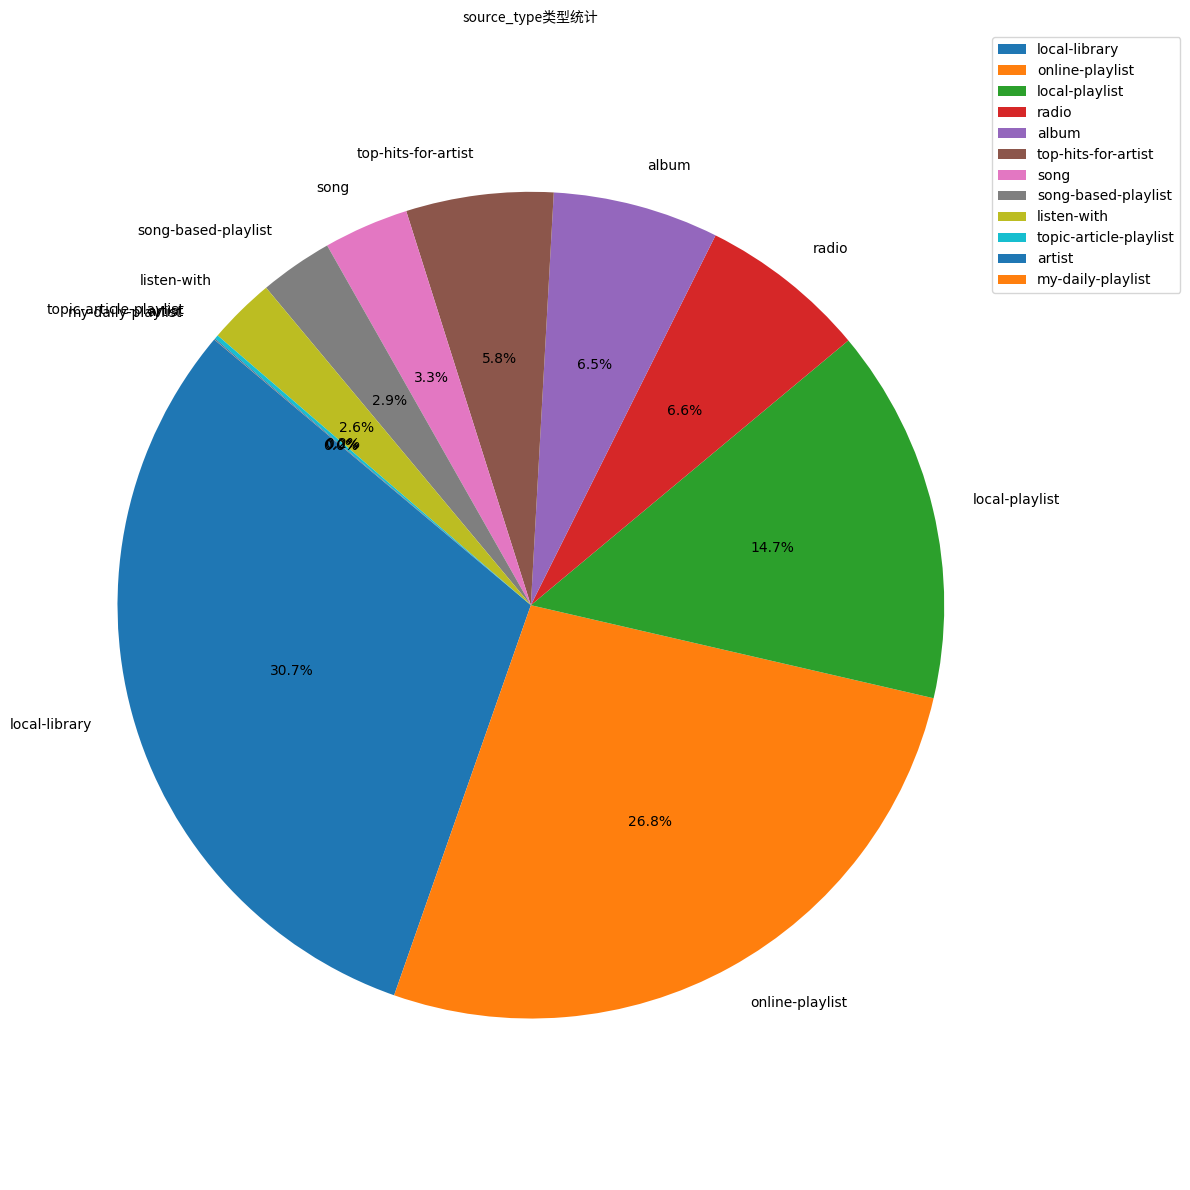

In [21]:
# source_type统计图绘制
fig, ax = plt.subplots(figsize=(12,12))
ax.pie(df_train_grouped['触发次数'], labels=df_train_grouped.index, autopct='%1.1f%%', startangle=140)
ax.legend(df_train_grouped.index, loc='upper left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('source_type类型统计', fontproperties=ZHFONT)
plt.axis('equal')  # 使饼图为圆形
plt.tight_layout()
plt.show() 

In [26]:
# 统计source_system_tab和source_screen_name，并绘制饼状图
df_source_sys_tab = df_train.groupby('source_system_tab').agg({'msno' : ['count']})
df_source_sys_tab.columns = ['触发次数']
df_source_sys_tab.sort_values(['触发次数'],inplace=True,ascending=False)

df_source_screen_name = df_train.groupby('source_screen_name').agg({'msno' : ['count']})
df_source_screen_name.columns = ['触发次数']
df_source_screen_name.sort_values(['触发次数'],inplace=True,ascending=False)
df_source_screen_name = df_source_screen_name.head(12)
display(df_source_sys_tab,df_source_screen_name)

,触发次数
source_system_tab,
my library,3684155
discover,2178698
search,623096
radio,476550
listen with,212242
explore,167882
notification,6183
settings,2200


,触发次数
source_screen_name,
Local playlist more,3227751
Online playlist more,1294324
Radio,474316
Album more,419987
Search,298415
Artist more,252403
Discover Feature,244181
Discover Chart,213637
Others profile more,201772


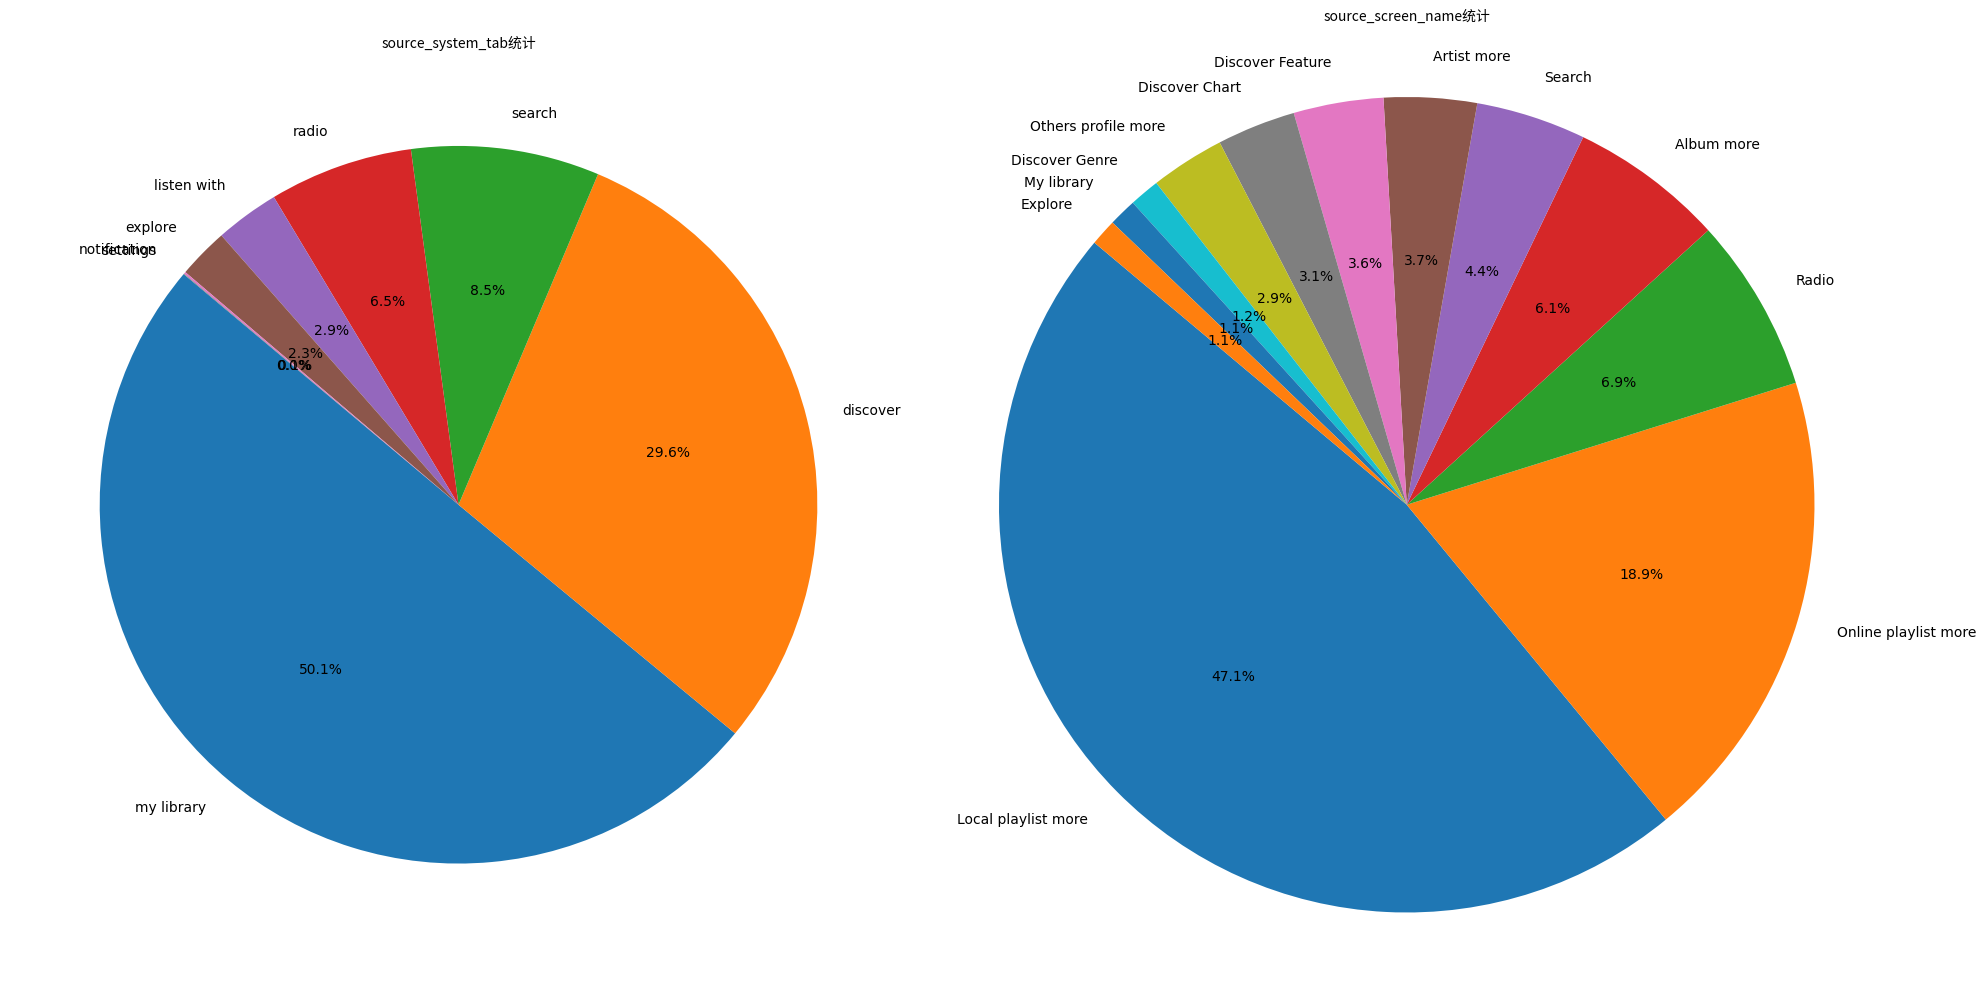

In [28]:
# 绘制饼状图
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
ax1.set_title('source_system_tab统计',fontproperties=ZHFONT)
ax2.set_title('source_screen_name统计',fontproperties=ZHFONT)

ax1.pie(df_source_sys_tab['触发次数'], labels=df_source_sys_tab.index, autopct='%1.1f%%', startangle=140)
ax2.pie(df_source_screen_name['触发次数'], labels=df_source_screen_name.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # 使饼图为圆形
plt.tight_layout()
plt.show() 